# Calculating Descriptive Statistics

In [1]:
# Mengimpor semua packages yang kita perlukan

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
# Membuat list python

x = [8.0,1,2.5,4,28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
# Buat objek np.nadarray dan pd.Series yang sesuai dengan x dan x_with_nan:

y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# Measures of Central Tendency

## Mean

In [4]:
# Menghitung mean dengan python menggunakan sum() dan len()
mean_ = sum(x) / len(x)
mean_

8.7

In [5]:
# Menggunakan fungsi statistics built in Python
mean_ = statistics.mean(x_with_nan)
print(mean_)

nan


In [6]:
# Menggunakan numpy
mean_ = np.mean(y)
mean_

8.7

In [7]:
# Menggunakan method .mean()
mean_ = y.mean()
mean_

8.7

In [8]:
# Ketika ada nilai nan diantara data kita
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [9]:
# Mengabaikan nilai nan
np.nanmean(y_with_nan)

8.7

In [10]:
# Pandas Series juga mempunyai method .mean()
mean_ = z.mean()
mean_

8.7

In [11]:
# .mean() dari pandas mengabaikan nilai nan secara default
z_with_nan.mean()

8.7

## Weighted Mean

In [12]:
# menghitung rata2 dari set
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [13]:
# mengimplementasikan weighted mean dalam python dengan menggabungkan sum() dengan range() atau zip()
x = [8.0,1,2.5,4,28.0]
w = [0.1,0.2,0.3,0.25,0.15]

wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
print(wmean)

wmean = sum(x_ * w_ for (x_, w_) in zip(x,w)) / sum(w)
print(wmean)

6.95
6.95


In [14]:
# mendapatkan weighted mean dari array NumPy atau Series Pandas
y,z,w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

wmean = np.average(z, weights=w)
print(wmean)

6.95
6.95


In [15]:
# menggunakan element-wise produc w*y dengan np.sum() atau .sum()
(w * y).sum() / w.sum()

6.95

## Harmonic Mean

In [16]:
# implementasi python pure dari harmonic mean
hmean = len(x) / sum(1/item for item in x)
hmean

2.7613412228796843

In [17]:
# menghitung ukuran ini dengan statistics.harmonic_mean()
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [18]:
scipy.stats.hmean(y)

2.7613412228796843

In [19]:
scipy.stats.hmean(z)

2.7613412228796843

## Geometric Mean

In [20]:
# Mengimplementasikan geometric mean dalam python pure
gmean = 1

for item in x:
    gmean *= item
    
gmean **= 1/len(x)
gmean

4.677885674856041

In [21]:
# mendapatkan geometric mean dengan scipy.stats.gmean()
scipy.stats.gmean(y)

4.67788567485604

In [22]:
scipy.stats.gmean(z)

4.67788567485604

## Median

In [23]:
# Implementasi Python pure dari median
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[indexex])
    
median_

4

In [24]:
# menggunakan fungsi seperti menggunakan median()
x

[8.0, 1, 2.5, 4, 28.0]

In [25]:
statistics.median_low(x[:-1])

2.5

In [26]:
statistics.median_high(x[:-1])

4

In [27]:
# tidak mengembalikan nan ketika ada nilai nan diantara titik data
print(statistics.median(x_with_nan))
print(statistics.median_low(x_with_nan))
print(statistics.median_high(x_with_nan))

6.0
4
8.0


In [28]:
# mendapatkan median dengan np.median()
median_ = np.median(y)
print(median_)

4.0


In [29]:
median_ = np.median(y[:-1])
print(median_)

3.25


## Mode

In [30]:
# mendapatkan mode dengan python pure
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [31]:
# mendapatkan mode dengan statistics.mode()
mode_ = statistics.mode(u)
mode_

2

In [32]:
# mendapatkan mode dengan scipy.stats.model()
u, v = np.array(u), np.array(v)

mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [33]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [34]:
# mendapatkan mode dan jumlah kemunculannya sebagai array NumPy dengan dot notation
print(mode_.mode)
print(mode_.count)

[12]
[3]


In [35]:
# pandas series memiliki metode .mode() yang mengabaikan nilai nan secara default
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2,2,math.nan])

print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


# Measures of Variability

Mengidentifikasi dan menghitung ukuran variabilitas berupa:
- Variance
- Standard deviation
- Skewness
- Percentiles
- Ranges

In [36]:
# menghitung sample variance dengan python pure
n = len(x)
mean_ = sum(x)/n
var_ = sum((item-mean_)**2 for item in x)/(n-1)
var_

123.19999999999999

In [37]:
# memanggil fungsi statistics.variance()
var_ = statistics.variance(x)
var_

123.2

In [38]:
# menggunakan fungsi np.var() atau method.var()
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [39]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [40]:
# pd series memiliki metode .var() yang mengabaikan nilai nan secara default
z.var(ddof=1)

123.19999999999999

# Standard Deviation

In [41]:
# menghitung deviasi standar dengan python pure
std_ = var_ ** 0.5
std_

11.099549540409285

In [42]:
# menggunakan statistics.stdev()
std_ = statistics.stdev(x)
std_

11.099549540409287

In [43]:
# menggunakan np.nanstd() untuk mengabaikan nilai nan
np.std(y, ddof=1)

11.099549540409285

In [44]:
y.std(ddof=1)

11.099549540409285

In [45]:
# pd.Series juga memiliki method .std() yang mengabaikan nan secara default
z.std(ddof=1)

11.099549540409285

# Skewness

In [46]:
# mendapatkan sample skewness dengan python pure
x = [8.0, 1, 2.5, 4, 28.0]

n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_) ** 2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = (sum((item-mean_)**3 for item in x)*n/((n-1)*(n-2)*std_**3))

In [47]:
skew_

1.9470432273905929

In [48]:
# menghitung sample skewness dengan scipy.stats.skew()
y, y_with_nan = np.array(x), np.array(x_with_nan)

scipy.stats.skew(y, bias=False)

1.9470432273905927

In [49]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [50]:
# pandas series memiliki metode .skew() yang juga mengembalikan skewness kumpulan data
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [51]:
z_with_nan.skew()

1.9470432273905924

# Percentiles

In [52]:
# menggunakan statistics.quantiles():
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [53]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [54]:
# mencari persentil ke-5 dan ke-95
y = np.array(x)
np.percentile(y,5)

-3.44

In [55]:
np.percentile(y,95)

34.919999999999995

In [56]:
np.percentile(y,[25,50,75])
np.median(y)

8.0

In [57]:
# gunakan np.nanpercentile() sebagai gantinya:
y_with_nan = np.insert(y,2,np.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [58]:
np.nanpercentile(y_with_nan, [25,50,75])

array([ 0.1,  8. , 21. ])

In [59]:
# memberikan nilai-nilai kuantitatif sebagai angka antara 0 dan 1, bukan persentil
np.quantile(y, 0.05)

-3.44

In [60]:
np.quantile(y, 0.95)

34.919999999999995

In [61]:
np.quantile(y,[0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [62]:
np.nanquantile(y_with_nan, [0.25,0.5,0.75])

array([ 0.1,  8. , 21. ])

In [63]:
# pd.Series objek memiliki method .quantile()
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05)

-3.44

In [64]:
z.quantile(0.95)

34.919999999999995

In [65]:
z.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [66]:
z_with_nan.quantile([0.25, 0.5, 0.75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

# Ranges

In [67]:
# Mendapatkan ranges dengan fungsi np.ptp()
np.ptp(y)

46.0

In [68]:
np.ptp(z)

46.0

In [69]:
np.ptp(y_with_nan)

nan

In [70]:
np.ptp(z_with_nan)

nan

Sebagai alternatif, kita dapat menggunakan fungsi dan method Python, NumPy, atau Pandas bawaan untuk menghitung maksimum dan minimum:
- max() and min () from the python standard library
- amax() and amin() from numpy
- nanmax() and nanmin() from numpy to ignore nan values
- .max() and .min() from numpy
- .max() and .min() from pandas to ignore nan values by default

In [71]:
# contoh penggunaan
np.amax(y) - np.amin(y)

46.0

In [72]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [73]:
y.max() - y.min()

46.0

In [74]:
z.max() - z.min()

46.0

In [75]:
z_with_nan.max() - z_with_nan.min()

46.0

In [76]:
# Interquartile range
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [77]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

# Summary of Descriptive Statistics

In [78]:
# menggunakan scipy.stats.describe()
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

describe() menghasilkan objek yang berupa descriptive statistics berikut:
- nobs : the number of observations or elements in your dataset
- minmax : the tuple with the minimum and maximum values of your dataset
- mean : the mean of your dataset
- variance : the variance of your dataset
- skewness : the skewness of your dataset
- kurtosis : the kurtosis of your dataset

In [79]:
# mengakses nilai tertentu dengan dot notation
result.nobs

9

In [80]:
result.minmax[0] # Min

-5.0

In [81]:
result.minmax[1] # Max

41.0

In [82]:
result.mean

11.622222222222222

In [83]:
result.variance

228.75194444444446

In [84]:
result.skewness

0.9249043136685094

In [85]:
result.kurtosis

0.14770623629658886

In [86]:
# Objek series memiliki metode .describe()
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

Mengembalikan Series baru yang menampung nilai berikut:
- count : the number of elements in your dataset
- mean : the mean of your dataset
- std : the standard deviation of your dataset
- min and max : the minimum & maximum values of your dataset
- 25%,50%,and 75% : the quartiles of your dataset

In [87]:
# mengakses setiap item result dengan labelnya:
result['mean']

11.622222222222222

In [88]:
result['std']

15.12454774346805

In [89]:
result['min']

-5.0

In [90]:
result['max']

41.0

In [91]:
result['25%']

0.1

In [92]:
result['50%']

8.0

In [93]:
result['75%']

21.0

# Measures of Correlation Between Pairs of Data

Measures of correlation antara pasangan data:
- Positive correlation, exist when larger values of x correspond to larger values of y and vice versa
- Negative correlation, exist when larger values of x correspond to smaller values of y and vice versa
- Weak or no correlation exists if there is no such apparent relationship

In [94]:
# Mendapatkan array NumPy dan Series yang sesuai:
x = list(range(-10,11))
y = [0,2,2,2,2,3,3,6,7,4,7,6,6,9,4,5,5,10,11,12,14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

# Covariance

In [95]:
# Menghitung kovarian dengan Python pure
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k]-mean_x)*(y[k]-mean_y) for k in range(n))) / (n-1)

In [96]:
cov_xy

19.95

In [97]:
# NumPy memiliki fungsi cov() yang mengembalikan covariance matrix
cov_matrix = np.cov(x_,y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [98]:
# Memeriksa nilai kovarian
x_.var(ddof=1)

38.5

In [99]:
y_.var(ddof=1)

13.914285714285711

In [100]:
cov_xy = cov_matrix[0,1]
cov_xy

19.95

In [101]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

In [102]:
# Series Pandas memiliki metode .cov() yang dapat digunakan untuk menghitung kovarian
cov_xy = x__.cov(y__)
cov_xy

19.95

In [103]:
cov_xy = y__.cov(x__)
cov_xy

19.95

# Correlation Coefficient

In [104]:
# Menghitung correlation coefficient dengan pure Python
var_x = sum((item - mean_x)**2 for item in x)/(n-1)
var_y = sum((item - mean_y)**2 for item in y)/(n-1)
std_x, std_y = var_x**0.5, var_y**0.5
r = cov_xy / (std_x*std_y)
r

0.861950005631606

In [105]:
# scipy.stats memiliki pearsonr() yang menghitung correlation coefficient dan the p-value
r, p = scipy.stats.pearsonr(x_,y_)
r

0.8619500056316058

In [106]:
p

5.122760847201207e-07

In [107]:
# menerapkan np.corrcoef() dengan x_ dan y_ sebagai argumen dan mendapatkan correlation coefficient matrix
corr_matrix = np.corrcoef(x_,y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [108]:
# Memeriksa nilai correlation coefficient
r = corr_matrix[0,1]
r

0.8619500056316061

In [109]:
r = corr_matrix[1,0]
r

0.861950005631606

In [110]:
# mendapatkan correlation coefficient dengan scipy.stats.linregress()
scipy.stats.linregress(x_,y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [111]:
# menggunakan dot notation
result = scipy.stats.linregress(x_,y_)
r = result.rvalue
r

0.861950005631606

In [112]:
# Series Pandas memiliki method .corr() untuk menghitung correlation coefficient
r = x__.corr(y__)
r

0.8619500056316061

In [113]:
r = y__.corr(x__)
r

0.861950005631606

# Working With 2D Data

## Axes

In [114]:
# Start by creating a 2D NumPy array:
a = np.array([[1,1,1],
             [2,3,1],
             [4,9,2],
             [8,27,4],
             [16,1,1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [115]:
# menerapkan fungsi dan metode statistik python
np.mean(a)

5.4

In [116]:
a.mean()

5.4

In [117]:
np.median(a)

2.0

In [118]:
a.var(ddof=1)

53.40000000000001

In [119]:
# Lets see axis=0 in action with np.mean()
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [120]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [121]:
# memberikan axis=1 pada mean()
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [122]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [123]:
# axis parameter bekerja dengan cara yang sama dengan fungsi dan metode NumPy lain
np.median(a, axis=0)

array([4., 3., 1.])

In [124]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [125]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [126]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [127]:
# bekerja dengan fungsi statistik SciPy
scipy.stats.gmean(a) # Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [128]:
scipy.stats.gmean(a, axis=0) 

array([4.        , 3.73719282, 1.51571657])

In [129]:
# mendapatkan perhitungan di semua kolom, untuk setiap baris
scipy.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [130]:
# statistik untuk seluruh dataset, menyediakan axis=None
scipy.stats.gmean(a, axis=None)

2.829705017016332

In [131]:
# mendapatkan statistik summary dengan satu panggilan fungsi untuk data 2D dengan scipy.stats.describe()
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [132]:
scipy.stats.describe(a, ddof=1, bias=False) # Default axis = 0

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [133]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [134]:
# mendapatkan nilai tertentu dari ringkasan dengan dot notation
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

# Dataframes

In [135]:
# Gunakan array a dan buat dataframe
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [136]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [137]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [138]:
# tentukan parameter axis=1
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [139]:
df.var(axis=1)

first       0.0
second      1.0
third      13.0
fourth    151.0
fifth      75.0
dtype: float64

In [140]:
# mengisolasi setiap kolom dataframe
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [141]:
# menerapkan method yang sesuai
df['A'].mean()

6.2

In [142]:
df['A'].var()

37.20000000000001

In [143]:
# mendapatkan semua data dari dataframe dengan .values atau .to_numpy()
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [144]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [145]:
# objek dataframe memiliki metode .describe() yang mengembalikan dataframe lain dengan statisics summary untuk semua kolom
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


Ringkasan tersebu berisi hasil sebagai berikut:
- count : the number of items in each column
- mean : the mean of each column
- std : the standard deviation
- min and max : the minimum & maximum values
- 25%,50%,and 75% : the percentiles

In [146]:
# mengakses setiap item summary
df.describe().at['mean','A']

6.2

In [147]:
df.describe().at['50%','B']

3.0

# Visualizing Data

In [148]:
# Mengimpor matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Box Plots

In [149]:
# create some data to represent with a box plot
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

The parameters of .boxplo() define the following:
- x is your data
- vert sets the plot orientation to horizontal when False. The default orientation is vertical
- showmeans shows the mean of your data when True
- meanline represents the mean as a line when True. The default representation is a point
- labels : the labels of your data
- patch_artist determines how to draw the graph
- medianprops denotes the properties of the line representing the median
- meanprops indicates the properties of the line or dot representing the mean

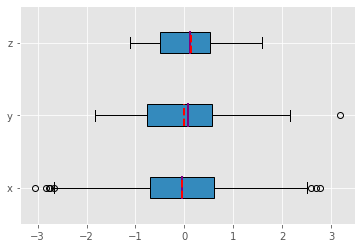

In [150]:
# mengaplikasikan boxplot
fig, ax = plt.subplots()
ax.boxplot((x,y,z),vert=False,showmeans=True, meanline=True,labels=('x','y','z'), patch_artist=True,
           medianprops={'linewidth':2, 'color':'purple'}, meanprops={'linewidth':2, 'color':'red'})
plt.show()

- The mean is the red dashed line
- The median is the purple line
- The first quartile is the left edge of the blue rectangle
- The third quartile is the right edge of the blue rectangle
- The interquartile range is the length of the blue rectangle
- The range contains everything from left to right
- The outliers are the dots to the left and right

## Histogram

In [151]:
# The function np.histogram() is a convenient way to get data for histograms
hist, bin_egdes = np.histogram(x, bins=10)
hist

array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15], dtype=int64)

In [152]:
bin_egdes

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

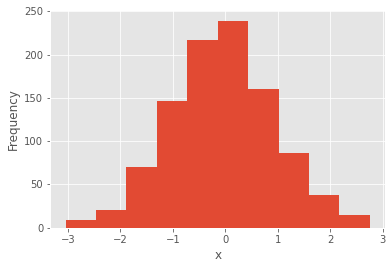

In [153]:
# what histogram() calculates .hist() can show graphically
fig, ax = plt.subplots()
ax.hist(x, bin_egdes, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

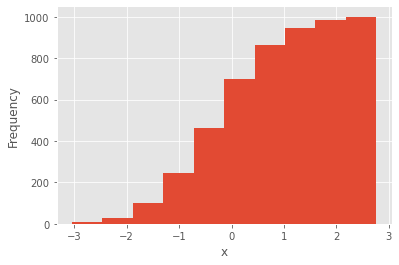

In [154]:
# its possible to get the histogram with the cummulative numbers of items if you provide the argument cummulative = True to.hist()
fig, ax = plt.subplots()
ax.hist(x, bin_egdes, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

## Pie Charts

In [155]:
# Lets define data associated to three labels
x,y,z = 128, 256, 1024

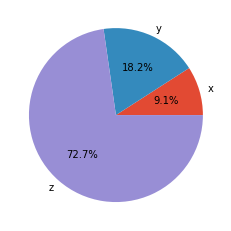

In [156]:
# create a pie charts
fig, ax = plt.subplots()
ax.pie((x,y,z), labels=('x','y','z'), autopct='%1.1f%%')
plt.show()

## Bar Charts

In [157]:
# Generate three datasets, each with 21 items
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.rand(21)

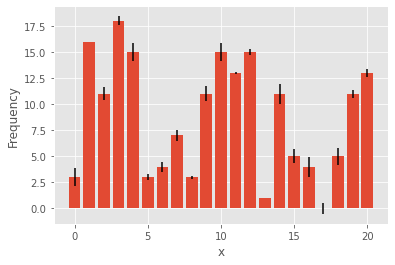

In [158]:
# Membuat diagram batang dengan .bar() jika anda ingin batang vertikal, .barh() untuk horizontal
fig, ax = plt.subplots()
ax.bar(x,y,yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

## X-Y Plots

In [159]:
# buat 2 kumpulan data dan lakukan regresi linier dengan scipy.stats.linregress()
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.rand(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression Line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

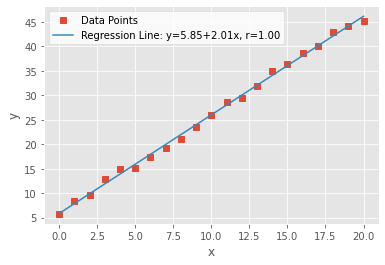

In [160]:
# Menerapkan .plot() untuk mendapatkan plot xy
fig, ax = plt.subplots()
ax.plot(x,y, linewidth=0, marker='s', label='Data Points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

## Heatmaps

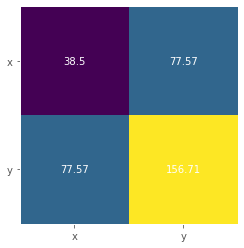

In [161]:
# buat heatmaps untuk matriks kovarians dengan .imshow():
matrix = np.cov(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,matrix[i,j],ha='center',va='center',color='w')
        
plt.show()

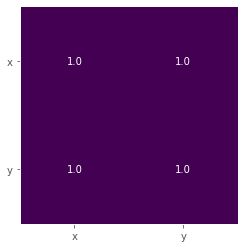

In [162]:
# Memperoleh heatmaps untuk matriks koefisien korelasi dengan mengikuti logika yang sama
matrix = np.corrcoef(x,y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.yaxis.set(ticks=(0,1), ticklabels=('x','y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,matrix[i,j],ha='center',va='center',color='w')
        
plt.show()